In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.12.0


In [6]:
from tensorflow.python import keras
print(keras.__version__)

2.6.0


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df=pd.read_csv('wine.csv')

In [9]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [10]:
#Q3. Check for null values, identify categorical variables, and encode them.
df.isnull().sum()
## There is no null values in this dataset

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
lab_encod=LabelEncoder()

In [14]:
df['quality']=lab_encod.fit_transform(df['quality'])

In [150]:
## Quality is the categorical varibale
## change the quality category value to numerical value
df['quality'] =df['quality'].map({"bad":1,"good":2})              

In [15]:
df['quality'].unique()

array([0, 1])

In [16]:
## split  input and output features
X=df.drop(labels='quality',axis=1)
y=df['quality']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
minmax=MinMaxScaler()

In [22]:
X_train=minmax.fit_transform(X_train)

In [23]:
X_test=minmax.transform(X_test)

In [24]:
X_train.shape[1]

11

In [25]:
X_train

array([[0.3539823 , 0.06849315, 0.36      , ..., 0.57480315, 0.30674847,
        0.4       ],
       [0.69911504, 0.23287671, 0.63      , ..., 0.19685039, 0.30674847,
        0.27692308],
       [0.2300885 , 0.28767123, 0.27      , ..., 0.51181102, 0.20858896,
        0.4       ],
       ...,
       [0.2300885 , 0.34246575, 0.06      , ..., 0.60629921, 0.10429448,
        0.16923077],
       [0.2920354 , 0.05479452, 0.35      , ..., 0.45669291, 0.26380368,
        0.53846154],
       [0.10619469, 0.11643836, 0.26      , ..., 0.51181102, 0.10429448,
        0.78461538]])

In [28]:
from tensorflow import keras

#### call back function

In [105]:
tf_cb=tf.keras.callbacks.TensorBoard(log_dir='logs/fit')
early_stoppring_cb=tf.keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)
model_checkpoint_cb=tf.keras.callbacks.ModelCheckpoint('Model_ckpt.h5',save_best_only=True)

In [98]:
model=keras.Sequential([
    keras.layers.Dense(100,activation='relu',input_shape=(11,)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

In [99]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
             )      

In [112]:
history=model.fit(X_train,y_train,epochs=30,batch_size=32,callbacks=[tf_cb,early_stoppring_cb,model_checkpoint_cb])

Epoch 1/30
35/35 [==============================] - 0s 4ms/step - loss: 0.5139 - accuracy: 0.7498
Epoch 2/30
35/35 [==============================] - 0s 3ms/step - loss: 0.5105 - accuracy: 0.7534
Epoch 3/30
35/35 [==============================] - 0s 3ms/step - loss: 0.5064 - accuracy: 0.7569
Epoch 4/30
35/35 [==============================] - 0s 3ms/step - loss: 0.5078 - accuracy: 0.7489
Epoch 5/30
35/35 [==============================] - 0s 3ms/step - loss: 0.5054 - accuracy: 0.7525
Epoch 6/30
35/35 [==============================] - 0s 3ms/step - loss: 0.5004 - accuracy: 0.7525
Epoch 7/30
35/35 [==============================] - 0s 4ms/step - loss: 0.5003 - accuracy: 0.7569
Epoch 8/30
35/35 [==============================] - 0s 3ms/step - loss: 0.4972 - accuracy: 0.7596
Epoch 9/30
35/35 [==============================] - 0s 3ms/step - loss: 0.4950 - accuracy: 0.7650
Epoch 10/30
35/35 [==============================] - 0s 3ms/step - loss: 0.4950 - accuracy: 0.7498
Epoch 11/30
35/35 [

In [107]:
model.evaluate(X_test,y_test)

15/15 [==============================] - 0s 2ms/step - loss: 0.5467 - accuracy: 0.7229


[0.546728789806366, 0.7229166626930237]

In [108]:
y_pred=model.predict(X_test)

15/15 [==============================] - 0s 1ms/step


In [109]:
y_pred=[1 if i > 0.5 else 0 for i in y_pred]

In [110]:
y_pred[:5]

[0, 0, 0, 0, 1]

In [111]:
y_test[:5]

803     1
124     0
350     1
682     0
1326    1
Name: quality, dtype: int32

In [113]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 100)               1200      
                                                                 
 dense_49 (Dense)            (None, 50)                5050      
                                                                 
 dense_50 (Dense)            (None, 1)                 51        
                                                                 
Total params: 6,301
Trainable params: 6,301
Non-trainable params: 0
_________________________________________________________________


In [117]:
df=pd.DataFrame(history.history)

In [118]:
df

,loss,accuracy
0,0.513939,0.749777
1,0.510480,0.753351
2,0.506398,0.756926
3,0.507783,0.748883
4,0.505402,0.752458
5,0.500421,0.752458
6,0.500302,0.756926
7,0.497218,0.759607
8,0.494953,0.764969
9,0.494955,0.749777


<Axes: >

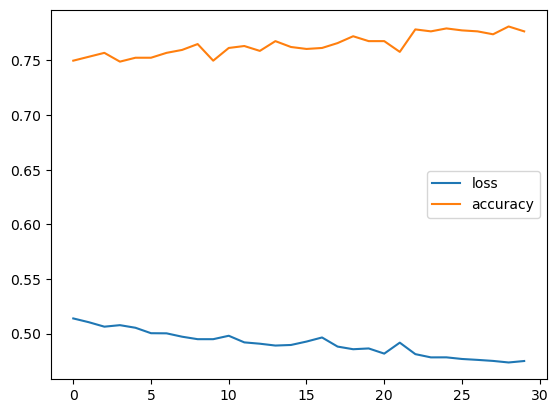

In [119]:
df.plot()

In [124]:
%load_ext tensorboard 

In [126]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 18256), started 0:01:14 ago. (Use '!kill 18256' to kill it.)